In [47]:
# EV charging stations


import pandas as pd

# Load the dataset
df = pd.read_csv(r'EV_Stations_data.csv')

In [48]:
# Explore data set and identifying potential features
print(df.info())
print(df.describe().to_string())
print(df.head(5).to_string()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station Name              385 non-null    object
 1   Street Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access Days Time          385 non-null    object
 4   EV Level1 EVSE Num        385 non-null    object
 5   EV Level2 EVSE Num        385 non-null    object
 6   EV DC Fast Count          385 non-null    object
 7   EV Other Info             385 non-null    object
 8   New Georeferenced Column  385 non-null    object
dtypes: object(9)
memory usage: 27.2+ KB
None
                                Station Name Street Address      City Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num EV DC Fast Count EV Other Info      New Georeferenced Column
count                                    385            385       385 

In [49]:
# Identify missing values

missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_info)


                          Missing Values  Percentage
Station Name                           0         0.0
Street Address                         0         0.0
City                                   0         0.0
Access Days Time                       0         0.0
EV Level1 EVSE Num                     0         0.0
EV Level2 EVSE Num                     0         0.0
EV DC Fast Count                       0         0.0
EV Other Info                          0         0.0
New Georeferenced Column               0         0.0


In [50]:
# Column renaming (Whitespaces)
def col_rename(df):
  # Using list comprehension to create a new column list with replaced names
  df.columns = [col.replace(' ', '_') for col in df.columns]
  return df

newdf = col_rename(df.copy())

# newdf is copy of dataset where we shall be making changes
print(df.columns)
print(df.head(5).to_string())
print()
print(newdf.columns)
print(newdf.head(5).to_string())

Index(['Station Name', 'Street Address', 'City', 'Access Days Time',
       'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
       'EV Other Info', 'New Georeferenced Column'],
      dtype='object')
                          Station Name          Street Address          City                    Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num EV DC Fast Count EV Other Info              New Georeferenced Column
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien                      24 hours daily               NONE                  2             NONE          NONE         POINT (-73.4764687 41.072882)
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden  24 hours daily; for Tesla use only               NONE               NONE                8          NONE          POINT (-72.773473 41.527367)
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls                      24 hours daily             

In [51]:
# changing values 'NONE' in columns to be represented by 0
newdf= newdf.replace('NONE','0')
print(newdf.head(5).to_string())
print(newdf.info())

                          Station_Name          Street_Address          City                    Access_Days_Time EV_Level1_EVSE_Num EV_Level2_EVSE_Num EV_DC_Fast_Count EV_Other_Info              New_Georeferenced_Column
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien                      24 hours daily                  0                  2                0             0         POINT (-73.4764687 41.072882)
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden  24 hours daily; for Tesla use only                  0                  0                8             0          POINT (-72.773473 41.527367)
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls                      24 hours daily                  0                  1                0             0  POINT (-73.065583 41.44548100000001)
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook                      24 hours daily        

In [52]:
# changing datatype from object to integers

try:
  for col in ['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']:
    newdf[col] = pd.to_numeric(newdf[col], errors='coerce')  # Handle conversion errors
    
except:
  pass 

print(newdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station_Name              385 non-null    object
 1   Street_Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access_Days_Time          385 non-null    object
 4   EV_Level1_EVSE_Num        385 non-null    int64 
 5   EV_Level2_EVSE_Num        385 non-null    int64 
 6   EV_DC_Fast_Count          385 non-null    int64 
 7   EV_Other_Info             385 non-null    object
 8   New_Georeferenced_Column  385 non-null    object
dtypes: int64(3), object(6)
memory usage: 27.2+ KB
None


In [53]:
# changing other column data types to string

# # Convert specified columns to string
# column_strings = ['Station_Name', 'Street_Address', 'City']  
# try:
#     newdf[column_strings] = newdf[column_strings].astype(str)
# except (KeyError, TypeError) as e:  # Handle potential errors
#     print(f"Error during conversion: {e}")
# print(newdf.dtypes)



In [54]:
print(newdf.describe())
print(newdf.info())


       EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count
count          385.000000          385.000000        385.000000
mean             0.054545            2.036364          0.597403
std              0.489085            1.845244          2.131484
min              0.000000            0.000000          0.000000
25%              0.000000            1.000000          0.000000
50%              0.000000            2.000000          0.000000
75%              0.000000            2.000000          0.000000
max              8.000000           17.000000         16.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station_Name              385 non-null    object
 1   Street_Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access_Days_Time          385 non-null    obj

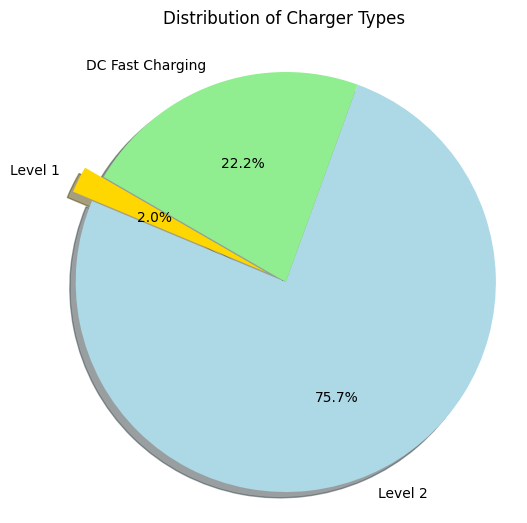

In [55]:

# Piechart representing the total distribution of charger types.

import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns


# Charging Level Distribution (Pie Chart)
level1_count = newdf['EV_Level1_EVSE_Num'].sum()
level2_count = newdf['EV_Level2_EVSE_Num'].sum()
dc_fast_count = newdf['EV_DC_Fast_Count'].sum()

counts = [level1_count, level2_count, dc_fast_count]
labels = ['Level 1', 'Level 2', 'DC Fast Charging']
colors = ['gold', 'lightblue', 'lightgreen']
explode = (0.1, 0, 0)

# Create a pie chart using Matplotlib
plt.figure(figsize=(6, 6))  
plt.pie(counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=150)  # Customize labels and appearance


plt.title('Distribution of Charger Types', pad=20)
plt.axis('equal')  # Equal aspect ratio for a circular pie chart
plt.show()

The pie chart shows the distribution of different types of EV chargers:

Level 1 Chargers: Basic chargers, typically used at home or in places where vehicles are parked for long periods.

Level 2 Chargers: Faster chargers, commonly found in public places such as shopping centers, workplaces, and parking garages.

DC Fast Chargers: High-speed chargers, ideal for quick charging at locations such as highway rest stops and commercial charging stations.

In [56]:
import folium
from folium.plugins import HeatMap
import re

# Function to extract latitude and longitude from 'New Georeferenced Column'
def extract_lat_lon(geo_str):
    match = re.search(r'POINT \(([-\d.]+) ([-\d.]+)\)', geo_str)
    if match:
        lon, lat = match.groups()
        return float(lat), float(lon)
    return None, None

# Apply the function to create separate 'Latitude' and 'Longitude' columns
df['Latitude'], df['Longitude'] = zip(*df['New Georeferenced Column'].apply(extract_lat_lon))

# Convert relevant columns to numeric values
df['EV DC Fast Count'] = pd.to_numeric(df['EV DC Fast Count'], errors='coerce').fillna(0).astype(int)
df['EV Level2 EVSE Num'] = pd.to_numeric(df['EV Level2 EVSE Num'], errors='coerce').fillna(0).astype(int)
df['EV Level1 EVSE Num'] = pd.to_numeric(df['EV Level1 EVSE Num'], errors='coerce').fillna(0).astype(int)

# Define a color map for different levels
def get_marker_color(row):
    if row['EV DC Fast Count'] > 0:
        return 'red'
    elif row['EV Level2 EVSE Num'] > 0:
        return 'blue'
    elif row['EV Level1 EVSE Num'] > 0:
        return 'green'
    else:
        return 'gray'

# Create a map centered around an average location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add charging stations to the map
for idx, row in df.iterrows():
    marker_color = get_marker_color(row)
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Station Name'],
        tooltip=f"{row['City']} - Level1: {row['EV Level1 EVSE Num']}, Level2: {row['EV Level2 EVSE Num']}, DC Fast: {row['EV DC Fast Count']}",
        icon=folium.Icon(color=marker_color,icon_size=(18, 18),  icon='circle')
    ).add_to(m)

# Display the map
m

# Save the map as an HTML file
# m.save('EV_Charging_Stations.html')
